# Exercise 2: Temporal Difference - Cliff Walking with SARSA

## 1. Set up the Env't

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set up the Cliff Walking environment
env = gym.make('CliffWalking-v0')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## 2. Task

In [4]:
# SARSA Algorithm
def sarsa(env, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.1):
    # Initialize Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Track cumulative rewards
    rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(Q, state, epsilon)
        done = False
        total_reward = 0

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy(Q, next_state, epsilon)

            # SARSA update rule
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards

In [5]:
# Epsilon-greedy policy
def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Random action
    else:
        return np.argmax(Q[state])  # Greedy action

# Run SARSA
num_episodes = 1000
Q, rewards = sarsa(env, num_episodes)


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


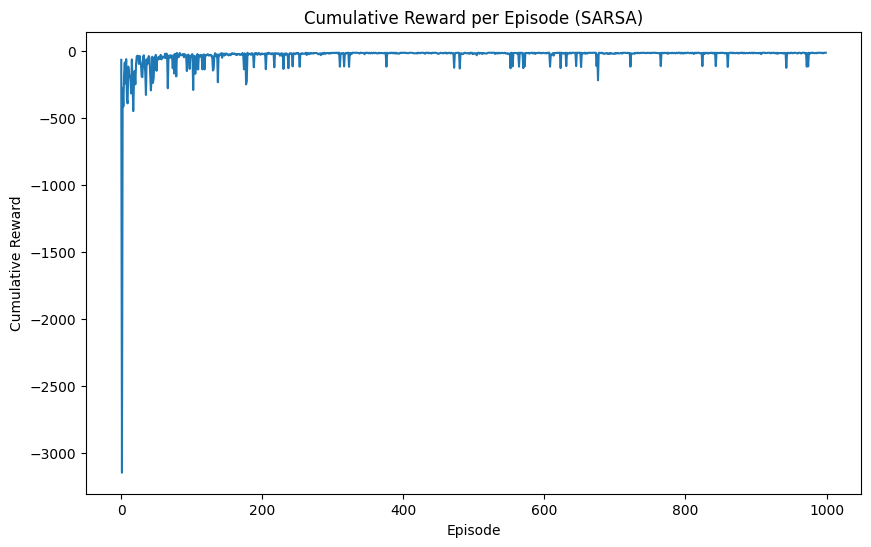

In [6]:
# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.title("Cumulative Reward per Episode (SARSA)")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.show()

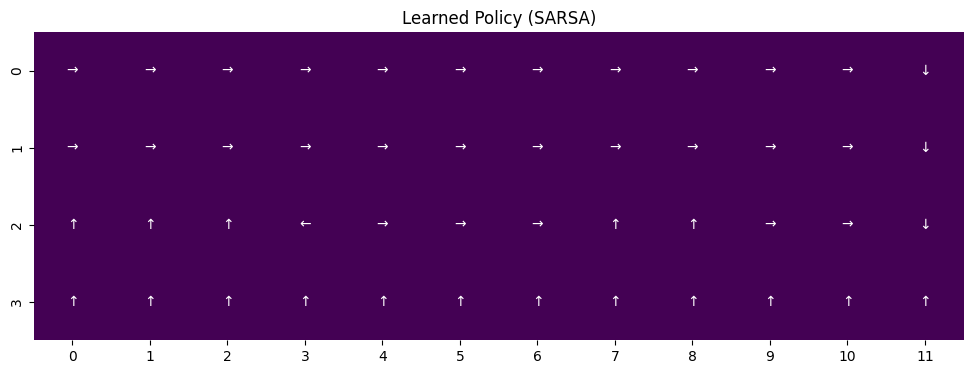

In [10]:
# Visualize the learned policy
def plot_policy(Q):
    policy = np.argmax(Q, axis=1).reshape(4, 12)
    arrows = {0: '↑', 1: '→', 2: '↓', 3: '←'}
    policy_grid = np.vectorize(arrows.get)(policy)

    plt.figure(figsize=(12, 4))
    sns.heatmap(np.zeros((4, 12)), annot=policy_grid, fmt="", cmap="viridis", cbar=False)
    plt.title("Learned Policy (SARSA)")
    plt.show()

# Plot the learned policy
plot_policy(Q)

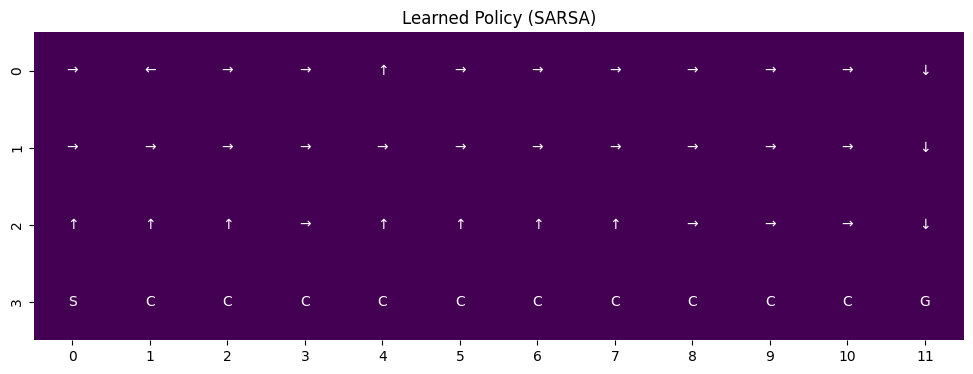

In [16]:
# Visualize the learned policy with start, goal, and cliff markers
def plot_policy(Q):
    # Reshape the Q-table to a 4x12 grid and find the optimal action for each state
    policy = np.argmax(Q, axis=1).reshape(4, 12)
    arrows = {0: '↑', 1: '→', 2: '↓', 3: '←'}  # Map actions to arrows
    policy_grid = np.vectorize(arrows.get)(policy)  # Convert actions to arrows

    # Mark the start, goal, and cliff positions
    policy_grid[3, 0] = 'S'  # Start position (state 36)
    policy_grid[3, 11] = 'G'  # Goal position (state 47)
    policy_grid[3, 1:11] = 'C'  # Cliff positions (states 37 to 46)

    # Plot the policy as a heatmap
    plt.figure(figsize=(12, 4))
    sns.heatmap(np.zeros((4, 12)), annot=policy_grid, fmt="", cmap="viridis", cbar=False)
    plt.title("Learned Policy (SARSA)")
    plt.show()

# Plot the learned policy
plot_policy(Q)